In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

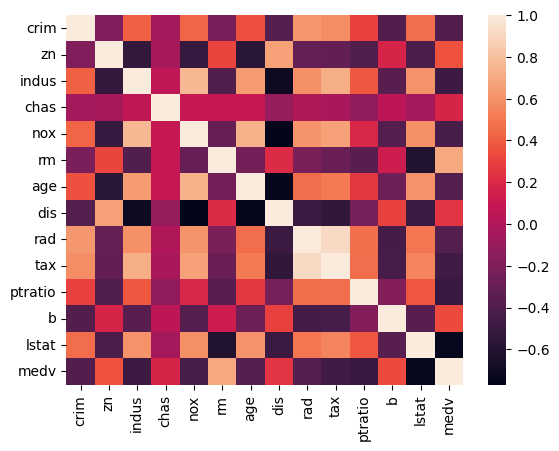

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df

,NAME,EDUCATION,PRODUCT,YEARS,TURNOVER
0,akshay,bsc,soap,4,600000
1,kiran,bsc,handwash,5,800000
2,sudesh,llb,earings,4,500000
3,sreeram,mca,gadgets,6,500000
4,vasnth,btech,wash,8,400000


In [ ]:
#columns_encoded = pd.get_dummies(df, columns = (['NAME','EDUCATION','PRODUCT']))

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()

#df['NAME'] = label_encoder.fit_transform(df['NAME'])
#df['EDUCATION'] = label_encoder.fit_transform(df['EDUCATION'])
#df['PRODUCT'] = label_encoder.fit_transform(df['PRODUCT'])

In [ ]:
y = df['medv']

In [ ]:
x = df.drop('medv',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_lr_train_predicted = lr.predict(x_train)
y_lr_test_predicted = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
trained_mse = mean_squared_error(y_train,y_lr_train_predicted)
trained_r2 = r2_score(y_train,y_lr_train_predicted)

test_mse = mean_squared_error(y_test,y_lr_test_predicted)
test_r2 = r2_score(y_test,y_lr_test_predicted)

In [ ]:
results = pd.DataFrame(['linear regression',trained_mse,trained_r2,test_mse,test_r2]).transpose()
results

,0,1,2,3,4
0,linear regression,21.649377,0.733733,23.616994,0.755503


In [ ]:
results.columns = (['method','trained_mse','trained_r2','test_mse','test_r2'])

In [ ]:
results

,method,trained_mse,trained_r2,test_mse,test_r2
0,linear regression,21.649377,0.733733,23.616994,0.755503


Text(0.5, 0, 'Experimental logS')

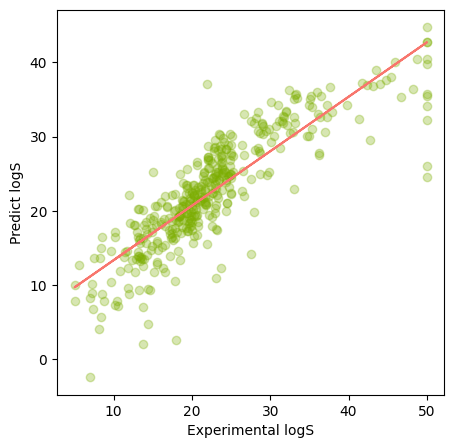

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_predicted,c="#7CAE00",alpha=0.3)

z = np.polyfit(y_train,y_lr_train_predicted,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),'#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')
